In [414]:
import re
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

## Задание 1

Вернемся к набору данных о [видеоиграх](https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/stat_case_study/vgsales.csv).

Ответьте на следующие вопросы:

* Как критики относятся к спортивным играм?
* Критикам нравятся больше игры на PC или на PS4?
* Критикам больше нравятся стрелялки или стратегии?

Для каждого вопроса:

* сформулируйте нулевую и альтернативную гипотезы;
* выберите пороговый уровень статистической значимости;
* опишите полученные результаты статистического теста.

In [415]:
video_game_df = pd.read_csv('https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/stat_case_study/vgsales.csv')

#### Как критики относятся к спортивным играм?

Сформируем гипотезы:
* H0 - Критики относятся хорошо к спортивным играм
* H1 - Критики относятся плохо к спортивным играм

In [416]:
sports_game = video_game_df[video_game_df['Genre'] == 'Sports']

Среднее значение оценок критиков = 71.97


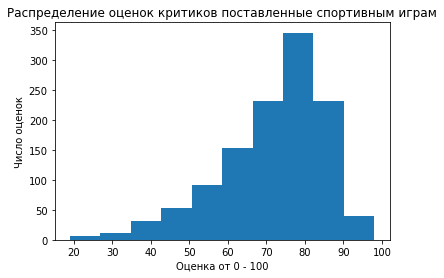

In [417]:
print('Среднее значение оценок критиков = ' + str(np.round(sports_game['Critic_Score'].mean(), 2)))
plt.hist(sports_game['Critic_Score'])
plt.title('Распределение оценок критиков поставленные спортивным играм')
plt.xlabel('Оценка от 0 - 100')
plt.ylabel('Число оценок')
plt.show();

Вывод: на нашей гистограмме мы можем увидеть, что большинство оценок по споривным играм положительные, и еще об этом нам говорит среднее значение, которое равняется 71.97, а это довольно высокая оценка. Следовательно мы можем принять нулевую гипотезу, о том что критики относятся хорошо к спортивным играм .

#### Критикам нравятся больше игры на PC или на PS4?
* H0 - критикам нравятся больше игры на PS4, чем на PC
* H1 - критикам нравятся игры больше на PC, чем на PS4

In [418]:
pc_sample = video_game_df[video_game_df['Platform'] == 'PC']
ps4_sample = video_game_df[video_game_df['Platform'] == 'PS4']

In [419]:
stat, pvalue = stats.ttest_ind(
    ps4_sample['Critic_Score'].fillna(ps4_sample['Critic_Score'].mean()),
    pc_sample['Critic_Score'].fillna(pc_sample['Critic_Score'].mean())
)

In [420]:
print(f'Pvalue = {pvalue:.6f}')

if pvalue > 0.05:
    print('Принимаем нулевую гипотезу о том, что критикам нравятся больше игры на PS4, чем на PC')
else:
    print('Принимаем альтернативную гипотезу о том, что критикам нравятся игры больше на PC, чем на PS4')

Pvalue = 0.000000
Принимаем альтернативную гипотезу о том, что критикам нравятся игры больше на PC, чем на PS4


Среднее значение критиков для платформы PC = 75.93
Среднее значение критиков для платформы PS4 = 72.09


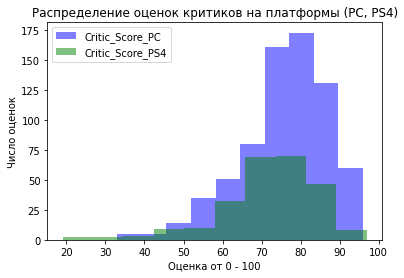

In [421]:
print('Среднее значение критиков для платформы PC = ' + str(np.round(pc_sample['Critic_Score'].mean(), 2)))
print('Среднее значение критиков для платформы PS4 = ' + str(np.round(ps4_sample['Critic_Score'].mean(), 2)))

plt.hist(pc_sample['Critic_Score'], color='blue', alpha=0.5);
plt.hist(ps4_sample['Critic_Score'], color='green', alpha=0.5);
plt.title('Распределение оценок критиков на платформы (PC, PS4)')
plt.xlabel('Оценка от 0 - 100')
plt.ylabel('Число оценок')
plt.legend(['Critic_Score_PC', 'Critic_Score_PS4'])
plt.show();

Вывод: тест нам не дал особо выводов, посмотрев на средние значения и расспределение мы увидим, что оно совпадает, и отличия только в количестве оценок, тут мы можем сделать вывод, что критикам нравятся игры одинаково на 2 платформах.

#### Критикам больше нравятся стрелялки или стратегии?
* H0 - критикам больше нравятся стрелялки
* H1 - критикам больше нравятся стратегии

In [422]:
strategy_sample = video_game_df[video_game_df['Genre'] == 'Strategy']
shooter_sample = video_game_df[video_game_df['Genre'] == 'Shooter']

In [423]:
stat, pvalue = stats.ttest_ind(
    strategy_sample['Critic_Score'].fillna(strategy_sample['Critic_Score'].mean()), 
    shooter_sample['Critic_Score'].fillna(shooter_sample['Critic_Score'].mean())
)

In [424]:
print(f'Pvalue = {pvalue:.6f}')

if pvalue > 0.05:
    print('Принимаем нулевую гипотезу о том, что критикам больше нравятся стрелялки')
else:
    print('Принимаем альтернативную гипотезу о том, что критикам больше нравятся стратегии')

Pvalue = 0.000239
Принимаем альтернативную гипотезу о том, что критикам больше нравятся стратегии


Среднее значение критиков для стратегий = 72.09
Среднее значение критиков для стрелялок = 70.18


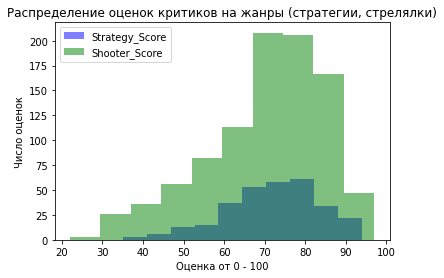

In [425]:
print('Среднее значение критиков для стратегий = ' + str(np.round(strategy_sample['Critic_Score'].mean(), 2)))
print('Среднее значение критиков для стрелялок = ' + str(np.round(shooter_sample['Critic_Score'].mean(), 2)))

plt.hist(strategy_sample['Critic_Score'], color='blue', alpha=0.5);
plt.hist(shooter_sample['Critic_Score'], color='green', alpha=0.5);
plt.title('Распределение оценок критиков на жанры (стратегии, стрелялки)')
plt.xlabel('Оценка от 0 - 100')
plt.ylabel('Число оценок')
plt.legend(['Strategy_Score', 'Shooter_Score'])
plt.show();

Вывод: такой же как и в прошлом кейсе, сказать то что критики больше любят стратегии мы не можем, хоть тест показал
уровень значимости < 0.05, так же по графику мы можем видеть что отличия есть лишь в количестве голосов.

## Задание 2

Реализуйте базовую модель логистической регрессии для классификации текстовых сообщений (используемые данные [здесь](https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/stat_case_study/spam.csv)) по признаку спама. Для этого:

* 1) Привидите весь текст к нижнему регистру;
* 2) Удалите мусорные символы;
* 3) Удалите стоп-слова;
* 4) Привидите все слова к нормальной форме;
* 5) Преобразуйте все сообщения в вектора TF-IDF. Вам поможет следующий код:

```python
    from sklearn.feature_extraction.text import TfidfVectorizer

    tfidf = TfidfVectorizer()
    tfidf_matrix = tfidf.fit_transform(df.Message)
    names = tfidf.get_feature_names_out()
    tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)
```

Можете поэкспериментировать с параметрами [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html);

* 6) Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите random_state=42. Используйте [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html);
* 7) Постройте модель [логистической регрессии](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), укажите random_state=42, оцените ее точность на тестовых данных;
* 8) Опишите результаты при помощи [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion_matrix#sklearn.metrics.confusion_matrix);
* 9) Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного).

In [451]:
spam_df = pd.read_csv('https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/stat_case_study/spam.csv')
spam_df['index'] = spam_df.index.values
spam_df.head()

,Category,Message,index
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,2
3,ham,U dun say so early hor... U c already then say...,3
4,ham,"Nah I don't think he goes to usf, he lives aro...",4


### 1) Привести текст к нижнему регистру.

In [452]:
spam_df['Message'] = spam_df['Message'].apply(str.lower)

### 2) Удалить мусорные символы

In [453]:
spam_df['Message'] = [re.sub('[\W_]+', ' ', text) for text in spam_df['Message']]

### 3) Удалить стоп слова

In [454]:
nltk.download('stopwords')
stopwords_set = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/maksimmigur/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [455]:
spam_df['Message'] = [text.split(' ') for text in spam_df['Message']]

In [456]:
spam_df['Message'] = [[word for word in text if word not in stopwords_set] for text in spam_df['Message']]

### 4) Привести все слова к нормальной форме (Лемматизация)

In [457]:
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/maksimmigur/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/maksimmigur/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [458]:
word_lemmatizer = WordNetLemmatizer()
spam_df['Message'] = [[word_lemmatizer.lemmatize(word) for word in text] for text in spam_df['Message']]

In [459]:
spam_df.head()

,Category,Message,index
0,ham,"[go, jurong, point, crazy, available, bugis, n...",0
1,ham,"[ok, lar, joking, wif, u, oni, ]",1
2,spam,"[free, entry, 2, wkly, comp, win, fa, cup, fin...",2
3,ham,"[u, dun, say, early, hor, u, c, already, say, ]",3
4,ham,"[nah, think, go, usf, life, around, though]",4


### 5) Преобразовать все сообщения в вектора TF-IDF

In [460]:
spam_df['Message'] = [' '.join(text) for text in spam_df['Message']]

In [461]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(spam_df['Message'])
names = tfidf.get_feature_names_out()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)

### 6) Разделить данные на тестовую и тренировочную выборку в соотношение 30/70.

In [462]:
X = tfidf_matrix
y = spam_df['Category']

In [463]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### 7) Построить модель логистической регрессии, и оценить ее точность на тестовых данных.

In [464]:
logistic_reg_model = LogisticRegression(random_state=42)

In [465]:
logistic_reg_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [466]:
y_predict = logistic_reg_model.predict(X_test)

In [467]:
logistic_reg_model.score(X_test, y_test)

0.958732057416268

### 8) Оценить результаты при помощи confusion_matrix

In [468]:
tn, fp, fn, tp = confusion_matrix(
    y_true=y_test,
    y_pred=y_predict
).ravel()

In [469]:
tn, fp, fn, tp

(1445, 3, 66, 158)

Вывод: модель 1455 раз предсказала неправильный клаcc верно, 3 раза предсказала неверно положительный класс, 66 раз неверно отрицательный класс, 158 верно положительный.

### 9) Построить датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного).

In [470]:
result_df = X_test
result_df['predict_class'] = y_predict
result_df['index'] = result_df.index.values

In [471]:
result_df = result_df.merge(spam_df, how='left', on='index')

In [472]:
error_clf_df = result_df[~(result_df['predict_class'] == result_df['Category'])]

In [473]:
error_clf_df[['predict_class','Category','Message']].head()

,predict_class,Category,Message
17,spam,ham,hey free call
40,ham,spam,reminder downloaded content already paid goto ...
47,ham,spam,guess somebody know secretly fancy wanna find ...
74,ham,spam,oh god found number glad text back xafter msg ...
84,ham,spam,next amazing xxx picsfree1 video sent enjoy on...
